In [55]:
import os
#os.chdir('C:/Users/mikha/Desktop/ECON 4763/Data')
os.chdir('/Users/akiratachibana/Downloads/Classes/ECON4763/Project')
import numpy as np
import pandas as pd
import math
from sklearn import model_selection, preprocessing, metrics, linear_model, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.pipeline import make_pipeline
import pandas as pd, numpy, string
from nltk.tokenize import WordPunctTokenizer
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

import re

from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GB

#pipeline
from numpy import where
from matplotlib import pyplot

#Resampling_Pipeline function
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import TfidfVectorizer 

#train = pd.read_csv("hatespeechtrain.csv")
train = pd.read_csv('hate_dataset.csv')
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [56]:
#data cleaning
porter=PorterStemmer()
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    words = tok.tokenize(lower_case)
    #Stemming
    stem_sentence=[]
    for word in words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    words="".join(stem_sentence).strip()
    return words

nums = [0,len(train)]
clean_tweet_texts = []
for i in range(nums[0],nums[1]):
    clean_tweet_texts.append(tweet_cleaner(train['tweet'][i]))

    
train_clean = pd.DataFrame(clean_tweet_texts,columns=['tweet'])
train_clean['label'] = train.label
train_clean['id'] = train.id



In [57]:
#split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train_clean['tweet'],train_clean['label'])

train_x

23663    so happi to be with the peopl that i miss the ...
6254                   sinc find god thing have got better
27203    thank you for the too i hope your weekend ha b...
11314          the app storehous will be shut down on juli
29524    lot of sponsor on the tabl and cycl mtbrace ci...
                               ...                        
20269    mtv went fullretard on video nzpol auspol merk...
2183     jacksonvil rooster simul i want to climb the v...
27432    decid on the next len i want and it s basic th...
17860    what dad want in their home mancav father day ...
25758    realli need to get some buddha s like these fo...
Name: tweet, Length: 23971, dtype: object

In [58]:
train_x.shape

(23971,)

In [63]:
train_x.head()

23663    so happi to be with the peopl that i miss the ...
6254                   sinc find god thing have got better
27203    thank you for the too i hope your weekend ha b...
11314          the app storehous will be shut down on juli
29524    lot of sponsor on the tabl and cycl mtbrace ci...
Name: tweet, dtype: object

In [67]:
#label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000,stop_words='english')
tfidf_vect.fit(train_clean['tweet'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

In [68]:
xtrain_tfidf.shape

(23971, 31216)

In [69]:
# Testing model on Donald Trump tweets

test = pd.read_csv("realdonaldtrump.csv")
test.head()
trumptest = test.iloc[:,2]
trumptest_x = trumptest
trumptest.shape

(43352,)

In [70]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=100000,stop_words='english')
tfidf_vect.fit(train_clean['tweet'])
trumptest_x = tfidf_vect.transform(trumptest_x)

In [72]:
trumptest_x.shape

(43352, 31216)

In [8]:
#Percentage of Positive/Negative, before oversampling
print("Positive: ", train.label.value_counts()[0]/len(train)*100,"%")
print("Negative: ", train.label.value_counts()[1]/len(train)*100,"%")

print("Positive: ", train.label.value_counts()[0])
print("Negative: ", train.label.value_counts()[1])

Positive:  92.98542018647143 %
Negative:  7.014579813528565 %
Positive:  29720
Negative:  2242


In [9]:
oversample = SMOTE()
xtrain_tfidf, train_y = oversample.fit_resample(xtrain_tfidf, train_y)

### <font color='darkblue'> AKIRA

In [17]:
xtrain_tfidf

<44676x31216 sparse matrix of type '<class 'numpy.float64'>'
	with 373165 stored elements in Compressed Sparse Row format>

In [18]:
arr_xtrain = xtrain_tfidf.toarray()

In [19]:
arr_xtrain

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
df_xtrain = pd.DataFrame(arr_xtrain)

In [21]:
df_xtrain.shape

(44676, 31216)

In [22]:
df_xtrain.head()

,0,1,2,3,4,5,6,7,8,9,...,31206,31207,31208,31209,31210,31211,31212,31213,31214,31215
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Testing data proportion after SMOTE oversampling
positive = 0
negative = 0

for n in train_y:
    if n == 0:
        positive = positive + 1
    elif n == 1:
        negative = negative + 1

print("Positive =", (positive/(positive+negative))*100,"%, ",positive,"observations.")
print("Negative =", (negative/(positive+negative))*100,"%, ",negative,"observations.")

Positive = 50.0 %,  22338 observations.
Negative = 50.0 %,  22338 observations.


In [46]:
#Tuning KNNC n_neighbors using GridSearchCV
count = 0
KNNCscorearray = [1,2,3,4,5,6,7,8,9,10]

tuned_parameters = {'n_neighbors': KNNCscorearray}

scores = ['recall']

for score in scores:
    print("# Tuning for %s\n" % score)

    clf = GridSearchCV(KNNC(), tuned_parameters, cv=5, scoring='%s_macro' % score).fit(xtrain_tfidf, train_y)

    print("Best parameters set found on KNNC train set: ")
    print(clf.best_params_)
    print("\nGrid scores on KNNC train set:\n")
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
        KNNCres = KNNC(n_neighbors = KNNCscorearray[count]).fit(xtrain_tfidf, train_y)
        KNNCscorearray[count] = KNNCres.score(xvalid_tfidf,valid_y)
        count=count+1
        
    print("\nClassification Report:\n")
    print(classification_report(valid_y, clf.predict(xvalid_tfidf)))

# Tuning for recall

Best parameters set found on KNNC train set: 
{'n_neighbors': 2}

Grid scores on KNNC train set:

0.761 (+/-0.007) for {'n_neighbors': 1}
0.772 (+/-0.008) for {'n_neighbors': 2}
0.692 (+/-0.006) for {'n_neighbors': 3}
0.700 (+/-0.006) for {'n_neighbors': 4}
0.661 (+/-0.003) for {'n_neighbors': 5}
0.666 (+/-0.002) for {'n_neighbors': 6}
0.641 (+/-0.002) for {'n_neighbors': 7}
0.646 (+/-0.003) for {'n_neighbors': 8}
0.629 (+/-0.002) for {'n_neighbors': 9}
0.633 (+/-0.002) for {'n_neighbors': 10}

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.58      0.73      7413
           1       0.15      0.96      0.26       578

    accuracy                           0.61      7991
   macro avg       0.57      0.77      0.50      7991
weighted avg       0.93      0.61      0.70      7991



Text(0.5, 1.0, 'KNNC Optimized Neighbors')

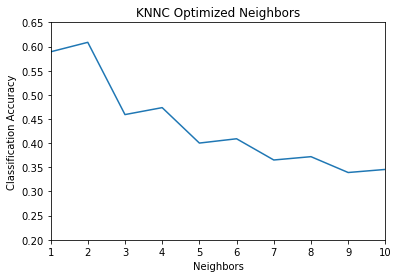

In [50]:
#Visualizing KNN by score
neighbors = [1,2,3,4,5,6,7,8,9,10]

plt.plot(neighbors, KNNCscorearray)
plt.xlim(1,10)
plt.ylim(0.2,0.65)

plt.ylabel('Classification Accuracy')
plt.xlabel('Neighbors')
plt.title('KNNC Optimized Neighbors')

In [74]:
#Support Vector Machine tuning C
count = 0
SVCscorearray = [1, 10, 100, 1000]

tuned_parameters = {'kernel': ['rbf'], 'C': SVCscorearray}

scores = ['recall']

for score in scores:
    print("# Tuning for %s\n" % score)

    clf = GridSearchCV(SVC(), tuned_parameters, cv=3, scoring='%s_macro' % score).fit(xtrain_tfidf, train_y)

    print("Best parameters set found on train set: ")
    print(clf.best_params_)
    print("\nGrid scores on train set:\n")
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        
        SVCres = SVC(C = SVCscorearray[count]).fit(xtrain_tfidf, train_y)
        SVCscorearray[count] = SVCres.score(xvalid_tfidf,valid_y)
        count = count+1
                     
print("\nClassification Report:\n")
print(classification_report(valid_y, clf.predict(xvalid_tfidf)))

# Tuning for recall

Best parameters set found on train set: 
{'C': 10, 'kernel': 'rbf'}

Grid scores on train set:

0.989 (+/-0.026) for {'C': 1, 'kernel': 'rbf'}
0.990 (+/-0.022) for {'C': 10, 'kernel': 'rbf'}
0.990 (+/-0.023) for {'C': 100, 'kernel': 'rbf'}
0.987 (+/-0.032) for {'C': 1000, 'kernel': 'rbf'}

Classification Report:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7413
           1       0.93      0.47      0.63       578

    accuracy                           0.96      7991
   macro avg       0.95      0.74      0.80      7991
weighted avg       0.96      0.96      0.95      7991



Text(0.5, 1.0, 'SVC Tuning C')

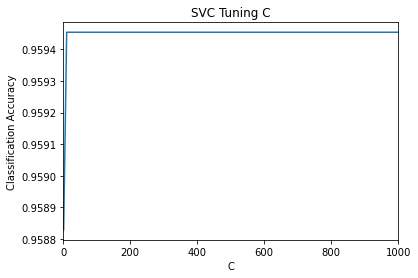

In [75]:
#Visualizing SVC
neighbors = [1,10,100,1000]

plt.plot(neighbors, SVCscorearray)
plt.xlim(0,1000)

plt.ylabel('Classification Accuracy')
plt.xlabel('C')
plt.title('SVC Tuning C')

In [88]:
array = np.arange(1,100)
finegrid = 0.0001*np.arange(100)
finegrid

array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
       0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
       0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003 , 0.0031,
       0.0032, 0.0033, 0.0034, 0.0035, 0.0036, 0.0037, 0.0038, 0.0039,
       0.004 , 0.0041, 0.0042, 0.0043, 0.0044, 0.0045, 0.0046, 0.0047,
       0.0048, 0.0049, 0.005 , 0.0051, 0.0052, 0.0053, 0.0054, 0.0055,
       0.0056, 0.0057, 0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063,
       0.0064, 0.0065, 0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071,
       0.0072, 0.0073, 0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079,
       0.008 , 0.0081, 0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087,
       0.0088, 0.0089, 0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095,
       0.0096, 0.0097, 0.0098, 0.0099])

In [131]:
#Multinomial Naive Bayes tuning alpha
from sklearn.naive_bayes import MultinomialNB as NB
from sklearn.model_selection import GridSearchCV

array = np.arange(1,100)
finegrid = 0.0001*np.arange(500)

NBscorearray = finegrid

count = 0

tuned_parameters = {'alpha': NBscorearray[1:]}

scores = ['recall']

for score in scores:
    print("# Tuning for %s\n" % score)

    clf = GridSearchCV(NB(), tuned_parameters, cv=5, scoring='%s_macro' % score).fit(xtrain_tfidf, train_y)

    print("Best parameters set found on train set: ")
    print(clf.best_params_)
    print("\nGrid scores on train set:\n")
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        
        NBres = NB(alpha = NBscorearray[count]).fit(xtrain_tfidf, train_y)
        NBscorearray[count] = NBres.score(xvalid_tfidf, valid_y)
        count = count+1
                     
    print("\nClassification Report:\n")
    print(classification_report(valid_y, clf.predict(xvalid_tfidf)))


# Tuning for recall

Best parameters set found on train set: 
{'alpha': 0.0088}

Grid scores on train set:

0.774 (+/-0.015) for {'alpha': 0.0001}
0.778 (+/-0.016) for {'alpha': 0.0002}
0.779 (+/-0.013) for {'alpha': 0.00030000000000000003}
0.780 (+/-0.014) for {'alpha': 0.0004}
0.781 (+/-0.013) for {'alpha': 0.0005}
0.782 (+/-0.014) for {'alpha': 0.0006000000000000001}
0.782 (+/-0.013) for {'alpha': 0.0007}
0.783 (+/-0.014) for {'alpha': 0.0008}
0.784 (+/-0.015) for {'alpha': 0.0009000000000000001}
0.784 (+/-0.015) for {'alpha': 0.001}
0.784 (+/-0.014) for {'alpha': 0.0011}
0.785 (+/-0.013) for {'alpha': 0.0012000000000000001}
0.785 (+/-0.014) for {'alpha': 0.0013000000000000002}
0.785 (+/-0.014) for {'alpha': 0.0014}
0.786 (+/-0.015) for {'alpha': 0.0015}
0.787 (+/-0.015) for {'alpha': 0.0016}
0.787 (+/-0.015) for {'alpha': 0.0017000000000000001}
0.787 (+/-0.015) for {'alpha': 0.0018000000000000002}
0.788 (+/-0.016) for {'alpha': 0.0019}
0.788 (+/-0.016) for {'alpha': 0.002}
0.789 (+

0.792 (+/-0.028) for {'alpha': 0.0188}
0.791 (+/-0.029) for {'alpha': 0.0189}
0.791 (+/-0.029) for {'alpha': 0.019}
0.791 (+/-0.029) for {'alpha': 0.019100000000000002}
0.791 (+/-0.029) for {'alpha': 0.019200000000000002}
0.791 (+/-0.029) for {'alpha': 0.0193}
0.792 (+/-0.029) for {'alpha': 0.0194}
0.792 (+/-0.029) for {'alpha': 0.0195}
0.792 (+/-0.029) for {'alpha': 0.0196}
0.792 (+/-0.029) for {'alpha': 0.019700000000000002}
0.792 (+/-0.029) for {'alpha': 0.0198}
0.791 (+/-0.030) for {'alpha': 0.0199}
0.791 (+/-0.029) for {'alpha': 0.02}
0.791 (+/-0.029) for {'alpha': 0.0201}
0.791 (+/-0.029) for {'alpha': 0.020200000000000003}
0.791 (+/-0.029) for {'alpha': 0.020300000000000002}
0.791 (+/-0.029) for {'alpha': 0.0204}
0.791 (+/-0.029) for {'alpha': 0.0205}
0.791 (+/-0.029) for {'alpha': 0.0206}
0.791 (+/-0.029) for {'alpha': 0.0207}
0.791 (+/-0.029) for {'alpha': 0.020800000000000003}
0.791 (+/-0.029) for {'alpha': 0.020900000000000002}
0.791 (+/-0.029) for {'alpha': 0.021}
0.791 (+/

0.783 (+/-0.029) for {'alpha': 0.0378}
0.783 (+/-0.029) for {'alpha': 0.0379}
0.782 (+/-0.029) for {'alpha': 0.038}
0.782 (+/-0.029) for {'alpha': 0.0381}
0.782 (+/-0.029) for {'alpha': 0.038200000000000005}
0.782 (+/-0.029) for {'alpha': 0.0383}
0.782 (+/-0.029) for {'alpha': 0.038400000000000004}
0.782 (+/-0.029) for {'alpha': 0.0385}
0.782 (+/-0.029) for {'alpha': 0.0386}
0.782 (+/-0.029) for {'alpha': 0.038700000000000005}
0.782 (+/-0.029) for {'alpha': 0.0388}
0.782 (+/-0.029) for {'alpha': 0.038900000000000004}
0.782 (+/-0.029) for {'alpha': 0.039}
0.782 (+/-0.029) for {'alpha': 0.0391}
0.782 (+/-0.029) for {'alpha': 0.0392}
0.782 (+/-0.029) for {'alpha': 0.0393}
0.782 (+/-0.029) for {'alpha': 0.039400000000000004}
0.782 (+/-0.029) for {'alpha': 0.0395}
0.782 (+/-0.029) for {'alpha': 0.0396}
0.782 (+/-0.029) for {'alpha': 0.0397}
0.782 (+/-0.029) for {'alpha': 0.0398}
0.782 (+/-0.029) for {'alpha': 0.039900000000000005}
0.782 (+/-0.029) for {'alpha': 0.04}
0.782 (+/-0.029) for {'

Text(0.5, 1.0, 'Naive Bayes Tuning Alpha')

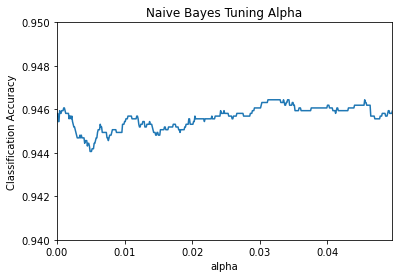

In [138]:
import matplotlib.pyplot as plt

array = np.arange(1,100)
finegrid = 0.0001*np.arange(500)

plt.plot(finegrid, NBscorearray)
plt.xlim(0,0.0495)
plt.ylim(0.94,0.95)

plt.ylabel('Classification Accuracy')
plt.xlabel('alpha')
plt.title('Naive Bayes Tuning Alpha')

In [1]:
NBTop = np.amax(NBscorearray[:])
NBTopIndex = np.where(NBscorearray==NBTop)
NBTopIndex

NameError: name 'np' is not defined

In [146]:
#Top hate speech classifiers based on tuned Naive Bayes
NBres = NB(alpha = 0.0088).fit(xtrain_tfidf, train_y)

HateSpeechSorted = NBres.feature_log_prob_[0, :].argsort()[::-1]
NotHateSpeechSorted = NBres.feature_log_prob_[1, :].argsort()[::-1]

print(np.take(tfidf_vect.get_feature_names(), HateSpeechSorted[:10]))
print(np.take(tfidf_vect.get_feature_names(), NotHateSpeechSorted[:10]))

['love' 'day' 's' 'thank' 'thi' 'happi' 't' 'posit' 'u' 'time']
['libtard' 'trump' 'white' 'black' 's' 't' 'like' 'thi' 'racist' 'liber']


In [144]:
#Random Forest, optimizing n_estimators

count = 0

estimators = [100,125,175,300]
RFscorearray = [0]*4

tuned_parameters = {'n_estimators': estimators}

print("# Tuning for recall\n")

clf = GridSearchCV(RF(max_depth=None, max_features = math.floor(math.sqrt(n_features)),min_samples_split = 2), 
                   tuned_parameters,cv=3, scoring='recall').fit(xtrain_tfidf, train_y)

print("Best parameters set found on train set: ")
print(clf.best_params_)
print("\nGrid scores on train set:\n")
    
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        
    RFcalc = RF(n_estimators=estimators[count], max_depth=None, max_features=math.floor(math.sqrt(n_features)), min_samples_split = 2)
    RFres = RFcalc.fit(xtrain_tfidf, train_y)
    RFscorearray[count] = RFres.score(xvalid_tfidf, valid_y)
    count=count+1
                     
print("\nClassification Report:\n")
print(classification_report(valid_y, clf.predict(xvalid_tfidf)))

# Tuning for recall

Best parameters set found on train set: 
{'n_estimators': 125}

Grid scores on train set:

0.283 (+/-0.028) for {'n_estimators': 100}
0.292 (+/-0.026) for {'n_estimators': 125}
0.287 (+/-0.028) for {'n_estimators': 175}
0.287 (+/-0.019) for {'n_estimators': 300}

Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      7431
           1       0.99      0.36      0.52       560

    accuracy                           0.95      7991
   macro avg       0.97      0.68      0.75      7991
weighted avg       0.96      0.95      0.94      7991



In [147]:
RFscorearray

[0.953072206232011, 0.9544487548492053, 0.9533224877987736, 0.9539481917156801]

In [150]:
RFcalc = RF(n_estimators=120, max_depth=None, max_features=math.floor(math.sqrt(n_features)), min_samples_split = 2)
RFres = RFcalc.fit(xtrain_tfidf, train_y)
print(RFres.score(xvalid_tfidf, valid_y))

0.953072206232011


In [7]:
#Gradient Boosting, optimizing n_estimators

count = 0

GBestimators = [1000, 5000, 10000]
GBscorearray = [0]*3

tuned_parameters = {'n_estimators': GBestimators}

print("# Tuning for recall\n")

clf = GridSearchCV(GB(n_estimators=n, learning_rate=0.1, max_depth=2), 
                   tuned_parameters,cv=3, scoring='recall').fit(xtrain_tfidf, train_y)

print("Best parameters set found on train set: ")
print(clf.best_params_)
print("\nGrid scores on train set:\n")
    
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
        
    GBcalc = GB(n_estimators=GBestimators[count], learning_rate=0.1, max_depth=2)
    GBres = GBcalc.fit(xtrain_tfidf, train_y)
    GBscorearray[count] = GBres.score(xvalid_tfidf, valid_y)
    count=count+1
                     
print("\nClassification Report:\n")
print(classification_report(valid_y, clf.predict(xvalid_tfidf)))

# Tuning for recall



KeyboardInterrupt: 

In [158]:
GBscorearray

[0.9428106619947441,
 0.9443123513953198,
 0.9454386184457515,
 0.9501939682142411]

1. trump (0.009604)
2. polit (0.009452)
3. liber (0.008127)
4. racist (0.007959)
5. libtard (0.007803)
6. white (0.007722)
7. sjw (0.007333)
8. allahsoil (0.007131)
9. black (0.006304)
10. s (0.004860)


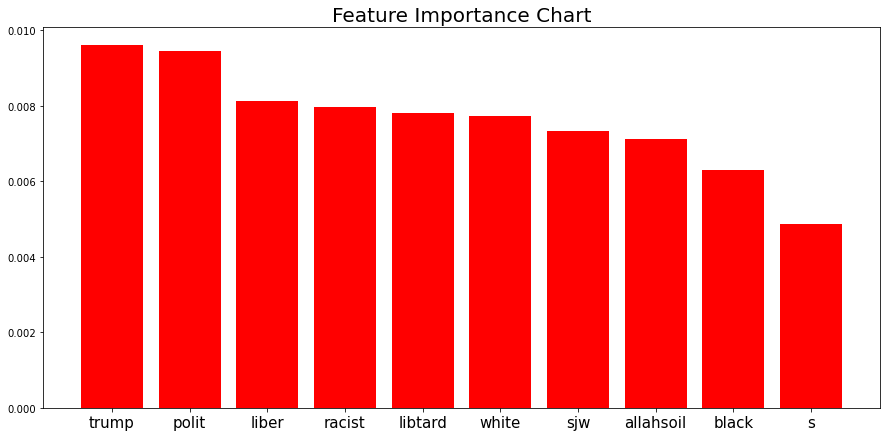

In [162]:
#Important Feature results from RF
RFcalc = RF(n_estimators=125, max_depth=None, max_features=math.floor(math.sqrt(n_features)), min_samples_split = 2)
RFres = RFcalc.fit(xtrain_tfidf, train_y)
importances = RFres.feature_importances_ 

top10v = np.sort(importances)[-10:][::-1] 
top10n = np.argsort(importances)[-10:][::-1] 

feature_names = np.asarray(tfidf_vect.get_feature_names()) 

for f in range(10):
    print("%d. %s (%f)" % (f + 1, feature_names[top10n[f]], top10v[f]))

plt.figure(figsize=(15,7))
plt.title("Feature Importance Chart",  fontsize=20)
plt.bar(feature_names[top10n], top10v, color="r")
plt.xticks(fontsize= 15)
plt.show()

# Summary

First step: data was cleaned of bad text, links, unnecessary spaces, and anything else that wasn't necessary.
Second, the clean data was split into training and test data by train_test_split.
This turned train_x and valid_x into trainx_tfidf and validx_tfidf
The train_x and valid_x (tweet content) were vectorized by word. stop_words were a generic English list for now.

We determined that the best fitting synthetic oversampling algorithm for our project is SMOTE.
xtrain_tfidf and train_y were oversampled via oversample.fit_resample().
The proportion of hate speech vs not hate speech was tested after the oversampling.
After oversampling, the two new training sets had an equal proportion of hate speech vs not. Success!

For each algorithm, we decided to score using recall to minimize Type II errors.


kNN was tuned to n_neighbors using GridSearchCV.
The optimal n_neighbors value was calculated to be 2 with a classification score of 0.941934676511075.
A graph was created to show relationship between n_neighbors and classification accuracy.

SVC was tuned by the C value, again using GridSearchCV.
Optimal C value was calculated to be 10 with a classification accuracy of 0.9624577649856088.
A graph was created to show relationship between C and classification accuracy.

Multinominal Naive Bayes was tuned to the alpha parameter using a fine grid in GridSearchCV.
Optimal alpha value was calculated to be 0.0088 with a classification accuracy of 0.9449380553122263.
A graph was created to show relationship between alpha and classification accuracy.
Using these results, we calculated the top 10 words by weight for each classification, as follows:
Not Hate Speech: ['love' 'day' 's' 'thank' 'thi' 'happi' 't' 'posit' 'u' 'time']
Hate Speech: ['libtard' 'trump' 'white' 'black' 's' 't' 'like' 'thi' 'racist' 'liber']

Random Forest was optimized by n_estimators using GridSearchCV.
Because of the time RF takes to process, I haven't found a precise value for n_estimators yet.
I know that the optimal value is between 120 and 130.
125 n_neighbors has been the highest scoring so far, with a classification accuracy of 0.9544487548492053.

Gradient Boosting was optimized by n_estimators using GridSearchCV.
Because of the time GB takes to process, I haven't found a precise value for n_estimators yet.
I know that the optimal value is probably above 300.


Best scores so far:
kNN : 0.941934676511075, n_neighbors = 2
SVC : 0.9624577649856088, C = 10
NB  : 0.9449380553122263, alpha = 0.0088
RF  : 0.9544487548492053, n_estimators = 125
GB  : 0.9501939682142411, n_estimators = 300

In [ ]:
trumptest.s

In [24]:
nums = [0,len(trumptest)]
clean_tweet_texts = []
for i in range(nums[1]):
    clean_tweet_texts.append(tweet_cleaner(trumptest[i]))
   
trump_clean = pd.DataFrame(clean_tweet_texts,columns=['tweet'])

/Users/akiratachibana/opt/anaconda3/lib/python3.9/site-packages/bs4/__init__.py:431: MarkupResemblesLocatorWarning: "https://www.whitehouse.gov/openingamerica/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


In [25]:
trump_clean['label'] = ""

In [26]:
trump_clean.head()

,tweet,label
0,be sure to tune in and watch donald trump on l...,
1,donald trump will be appear on the view tomorr...,
2,donald trump read top ten financi tip on late ...,
3,new blog post celebr apprentic final and lesso...,
4,my persona will never be that of a wallflow i ...,


In [49]:
tfidf_vect.fit(trump_clean['tweet'])
trump_tfidf =  tfidf_vect.transform(trump_clean)

In [53]:
xtrain_array = xtrain_tfidf.toarray()
trump_array = trump_tfidf.toarray()

In [56]:
xtrain_tfidf = pd.DataFrame(xtrain_array, columns=['id','label','tweet'])

ValueError: Shape of passed values is (44540, 31216), indices imply (44540, 3)

In [45]:
missingcols = set(xtrain_tfidf.columns) - set(trump_tfidf.columns)
for c in missingcols:
    trump_tfidf[c] = 0
trump_tfidf = trump_tfidf[xtrain_tfidf.columns]

In [26]:
SVCres = SVC(C = 10).fit(xtrain_tfidf, train_y)

In [37]:
train_clean

,tweet,label,id
0,when a father is dysfunct and is so selfish he...,0,1
1,thank for lyft credit i can t use caus they do...,0,2
2,bihday your majesti,0,3
3,model i love u take with u all the time in ur,0,4
4,factsguid societi now motiv,0,5
...,...,...,...
31957,ate isz that youuu,0,31958
31958,to see nina turner on the airwav tri to wrap h...,0,31959
31959,listen to sad song on a monday morn otw to wor...,0,31960
31960,sikh templ vandalis in in calgari wso condemn act,1,31961
